## Домашняя работа № 4 - Валидация моделей классификации

### Мацыкина А.С.

#### Т120-101М-20

## Валидация моделей классификации

Данные

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

%matplotlib inline
np.set_printoptions(precision=4)

df_source = pd.read_csv(
    'data/client_segmentation.csv', 
    dtype={'call_diff': np.float32, 'call_diff': np.float32, 'traffic_diff': np.float32, 'customes_class': np.uint16}
)
X = df_source[['call_diff','sms_diff','traffic_diff']].values
y = df_source.customes_class.values

df_source.head(5)

,call_diff,sms_diff,traffic_diff,customes_class
0,-0.666421,0.444911,-0.273538,0
1,-0.889273,-0.537896,-1.959469,2
2,-0.841503,0.846665,0.727606,0
3,1.389749,0.390911,1.789246,1
4,-1.228211,-1.375899,-1.434209,2


Найдите лучший классификатор по метрике f1-score

In [78]:
from sklearn.tree  import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score

    

# --------- ВАШ КОД ТУТ --------
   
scores = {}

for i in [
    DecisionTreeClassifier(), 
    GaussianNB(), 
    KNeighborsClassifier(), 
    LogisticRegression(), 
    RandomForestClassifier()]:
    
    model = i.fit(X, y)
    y_pred = i.predict(X)
    
    scores[model] = f1_score(y, y_pred, average='weighted')
    
ans = sorted(scores.items(), key=lambda item:item[1], reverse=True)
print(*ans, sep='\n')

# ------------------------------


(DecisionTreeClassifier(), 1.0)
(RandomForestClassifier(), 1.0)
(KNeighborsClassifier(), 0.979846223428313)
(LogisticRegression(), 0.979846223428313)
(GaussianNB(), 0.9498119457062514)


Лучшие классификаторы по метрике f1-score - DecisionTreeClassifier() и RandomForestClassifier()

## Валидация моделей линейной регрессии

Пользуясь методом .score подберите наилучшее значение степени полинома

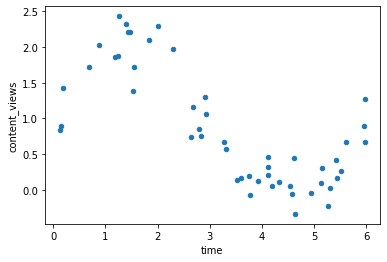

In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/content_views_toy_set.csv', encoding='utf8')
df.plot.scatter(x='time', y='content_views')
plt.show()

X = df['time'].values
y = df['content_views'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
reg = LinearRegression().fit(X_train.reshape(-1, 1), y_train)


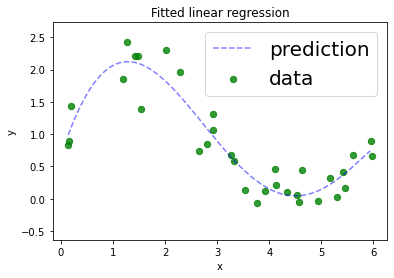

In [85]:
def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

X_train_5 = generate_degrees(X_train, 5)
X_test_5 = generate_degrees(X_test, 5)
reg_5 = LinearRegression().fit(X_train_5, y_train)

# строим график
margin = 0.3
support = np.arange(X.min(), X.max(), step=0.1)

X_test_support = generate_degrees(support, 5)
y_hat = reg_5.predict(X_test_support)

plt.plot(support, y_hat, 'b--', alpha=0.5, label='prediction')
plt.scatter(X_train, y_train, 40, 'g', 'o', alpha=0.8, label='data')
plt.xlim(X.min() - margin, X.max() + margin)
plt.ylim(y.min() - margin, y.max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted linear regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [91]:
# --------- ВАШ КОД ТУТ --------

min_degree = 1
max_degree = 100

scores = {}

for i in range(min_degree,max_degree):
    X_train_i = generate_degrees(X_train, i)
    X_test_i = generate_degrees(X_test, i)
    reg_i = LinearRegression().fit(X_train_i, y_train)

    scores[i] = reg_i.score(X_train_i, y_train)

ans = sorted(scores.items(), key=lambda item:item[1], reverse=True)
print(f'Наилучшее значение степени полинома - {ans[0][0]}, со значением score = {ans[0][1]}')

# ------------------------------

Наилучшее значение степени полинома - 15, со значением score = 0.9053718405288961
